In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

print("=== ОЧИСТКА ДАННЫХ CALIFORNIA HOUSING ===")

try:
    df = pd.read_csv('./data/raw/california_housing_dirty.csv')
    print("ДАННЫЕ ЗАГРУЖЕНЫ")
    print(f"Размер: {df.shape}")
    
except FileNotFoundError:
    print("Файл не найден")

=== ОЧИСТКА ДАННЫХ CALIFORNIA HOUSING ===
Файл не найден


In [25]:
print("=== РАСШИРЕННЫЙ ПЕРВИЧНЫЙ АНАЛИЗ ===")

print(f"1. ОСНОВНАЯ ИНФОРМАЦИЯ:")
print(f"   Записей: {df.shape[0]:,}")
print(f"   Колонок: {df.shape[1]}")
print(f"   Память: {df.memory_usage(deep=True).sum() / 1024**2:.1f} MB")

print(f"\n2. СТРУКТУРА ДАННЫХ:")
numeric_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(include=['object']).columns
print(f"   Числовые колонки: {len(numeric_cols)}")
print(f"   Категориальные колонки: {len(categorical_cols)}")

print(f"\n3. ДУБЛИКАТЫ:")
duplicates = df.duplicated().sum()
print(f"   Полные дубликаты: {duplicates} ({duplicates/len(df)*100:.1f}%)")

print(f"\n4. ПЕРВЫЕ 3 ЗАПИСИ:")
display(df.head(3))

=== РАСШИРЕННЫЙ ПЕРВИЧНЫЙ АНАЛИЗ ===
1. ОСНОВНАЯ ИНФОРМАЦИЯ:
   Записей: 20,640
   Колонок: 10
   Память: 2.5 MB

2. СТРУКТУРА ДАННЫХ:
   Числовые колонки: 9
   Категориальные колонки: 1

3. ДУБЛИКАТЫ:
   Полные дубликаты: 0 (0.0%)

4. ПЕРВЫЕ 3 ЗАПИСИ:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


=== ДЕТАЛЬНЫЙ АНАЛИЗ ПРОПУЩЕННЫХ ЗНАЧЕНИЙ ===
ПОЛНЫЙ ОТЧЕТ ПО ПРОПУСКАМ:


,Тип_данных,Пропуски,Процент_пропусков,Уникальные_значения
longitude,float64,0,0.000000,844
latitude,float64,0,0.000000,862
housing_median_age,float64,0,0.000000,52
total_rooms,float64,0,0.000000,5926
total_bedrooms,float64,207,1.002907,1923
population,float64,0,0.000000,3888
households,float64,0,0.000000,1815
median_income,float64,0,0.000000,12928
median_house_value,float64,0,0.000000,3842
ocean_proximity,object,0,0.000000,5


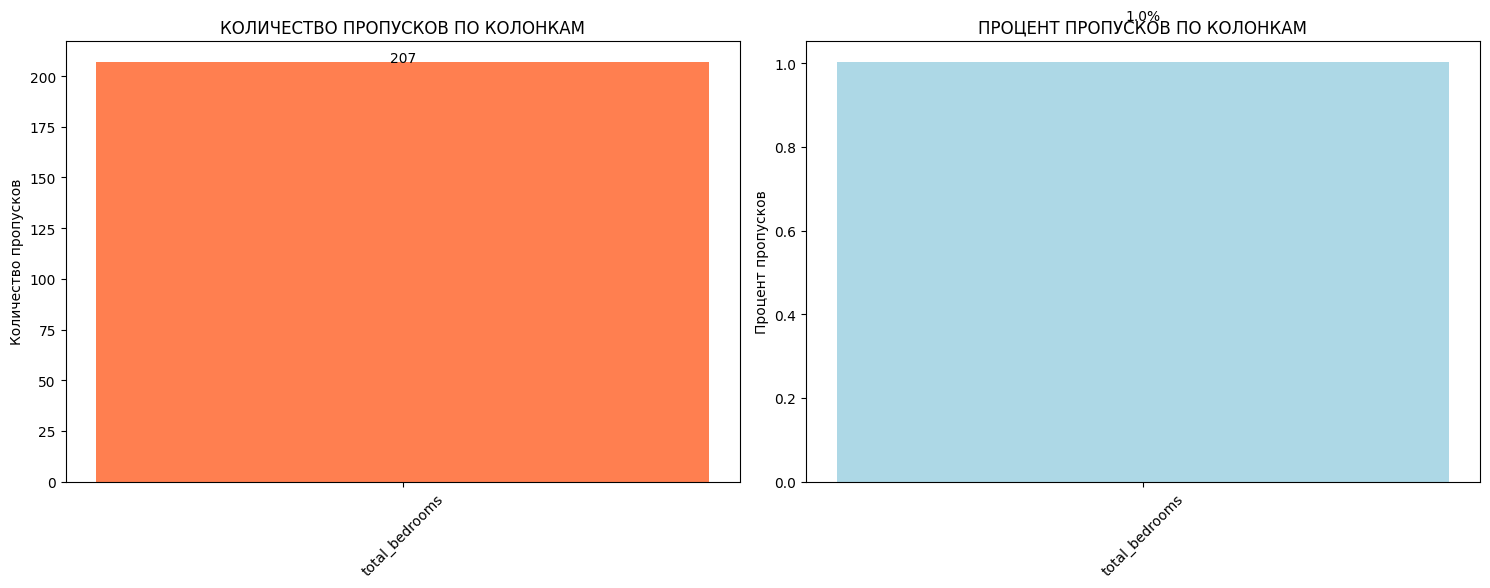

In [26]:
print("=== ДЕТАЛЬНЫЙ АНАЛИЗ ПРОПУЩЕННЫХ ЗНАЧЕНИЙ ===")

missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

missing_report = pd.DataFrame({
    'Тип_данных': df.dtypes,
    'Пропуски': missing_data,
    'Процент_пропусков': missing_percent,
    'Уникальные_значения': df.nunique()
})

print("ПОЛНЫЙ ОТЧЕТ ПО ПРОПУСКАМ:")
display(missing_report)

# Визуализация только колонок с пропусками
cols_with_missing = missing_data[missing_data > 0]

if len(cols_with_missing) > 0:
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # График 1: Количество пропусков
    axes[0].bar(cols_with_missing.index, cols_with_missing.values, color='coral')
    axes[0].set_title('КОЛИЧЕСТВО ПРОПУСКОВ ПО КОЛОНКАМ')
    axes[0].set_ylabel('Количество пропусков')
    axes[0].tick_params(axis='x', rotation=45)
    
    # График 2: Процент пропусков
    missing_pct = missing_percent[cols_with_missing.index]
    axes[1].bar(missing_pct.index, missing_pct.values, color='lightblue')
    axes[1].set_title('ПРОЦЕНТ ПРОПУСКОВ ПО КОЛОНКАМ')
    axes[1].set_ylabel('Процент пропусков')
    axes[1].tick_params(axis='x', rotation=45)
    
    # Добавляем значения на столбцы
    for i, v in enumerate(cols_with_missing.values):
        axes[0].text(i, v + 0.1, str(v), ha='center')
    for i, v in enumerate(missing_pct.values):
        axes[1].text(i, v + 0.1, f'{v:.1f}%', ha='center')
    
    plt.tight_layout()
    plt.show()
    
    # Анализ критических пропусков
    critical_missing = missing_report[missing_report['Процент_пропусков'] > 30]
    if len(critical_missing) > 0:
        print("КРИТИЧЕСКИЕ ПРОПУСКИ (>30%):")
        print(critical_missing[['Пропуски', 'Процент_пропусков']])
else:
    print("Пропусков не обнаружено")

=== ДЕТАЛЬНЫЙ АНАЛИЗ ВЫБРОСОВ ===
ОТЧЕТ ПО ВЫБРОСАМ:


,Колонка,Выбросы,Процент_выбросов,Нижняя_граница,Верхняя_граница
0,longitude,0,0.000000,-127.485000,-112.325000
1,latitude,0,0.000000,28.260000,43.380000
2,housing_median_age,0,0.000000,-10.500000,65.500000
3,total_rooms,1287,6.235465,-1102.625000,5698.375000
4,total_bedrooms,1271,6.157946,-230.500000,1173.500000
5,population,1196,5.794574,-620.000000,3132.000000
6,households,1220,5.910853,-207.500000,1092.500000
7,median_income,681,3.299419,-0.706375,8.013025
8,median_house_value,1071,5.188953,-98087.500000,482412.500000


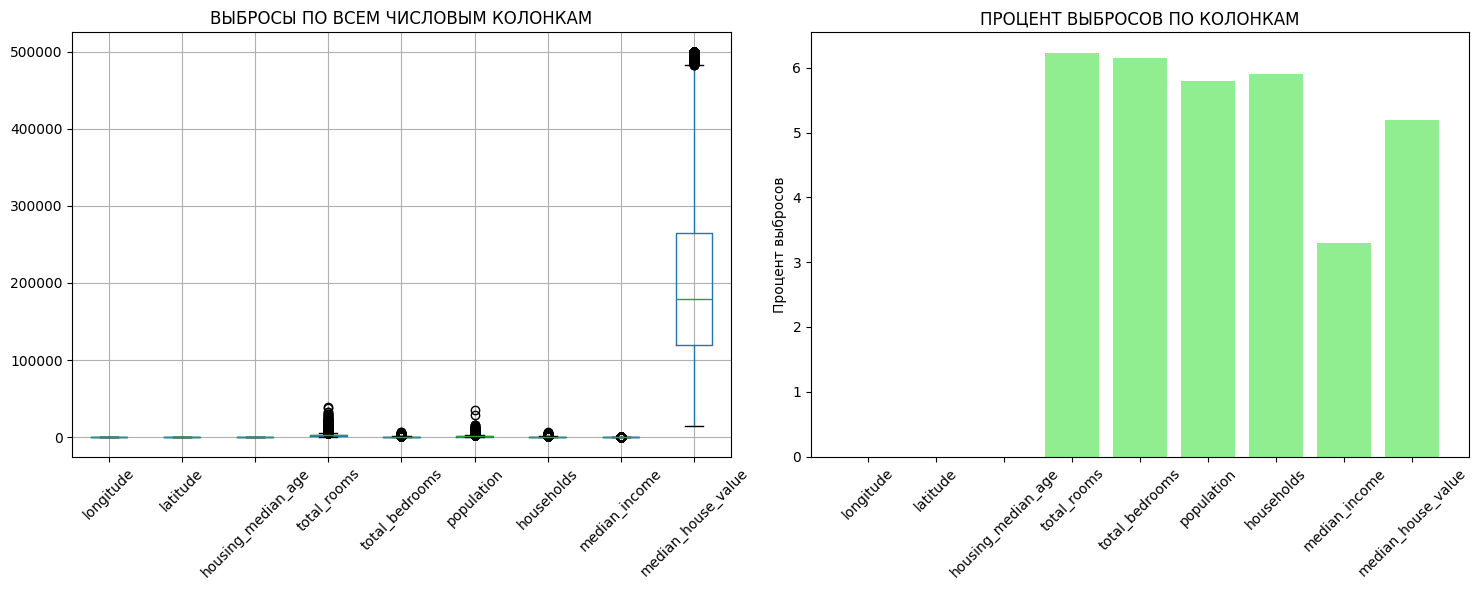

In [31]:
print("=== ДЕТАЛЬНЫЙ АНАЛИЗ ВЫБРОСОВ ===")

def detailed_outliers_analysis(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower) | (df[column] > upper)][column]
    
    return {
        'Колонка': column,
        'Выбросы': len(outliers),
        'Процент_выбросов': (len(outliers) / len(df)) * 100,
        'Нижняя_граница': lower,
        'Верхняя_граница': upper
    }

outliers_report = []
for col in numeric_cols:
    report = detailed_outliers_analysis(df, col)
    outliers_report.append(report)

outliers_df = pd.DataFrame(outliers_report)
print("ОТЧЕТ ПО ВЫБРОСАМ:")
display(outliers_df)

# Визуализация выбросов
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Boxplot всех числовых признаков
df[numeric_cols].boxplot(ax=axes[0])
axes[0].set_title('ВЫБРОСЫ ПО ВСЕМ ЧИСЛОВЫМ КОЛОНКАМ')
axes[0].tick_params(axis='x', rotation=45)

# Процент выбросов по колонкам
outliers_pct = [report['Процент_выбросов'] for report in outliers_report]
axes[1].bar(numeric_cols, outliers_pct, color='lightgreen')
axes[1].set_title('ПРОЦЕНТ ВЫБРОСОВ ПО КОЛОНКАМ')
axes[1].set_ylabel('Процент выбросов')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

=== АНАЛИЗ РАСПРЕДЕЛЕНИЙ ===


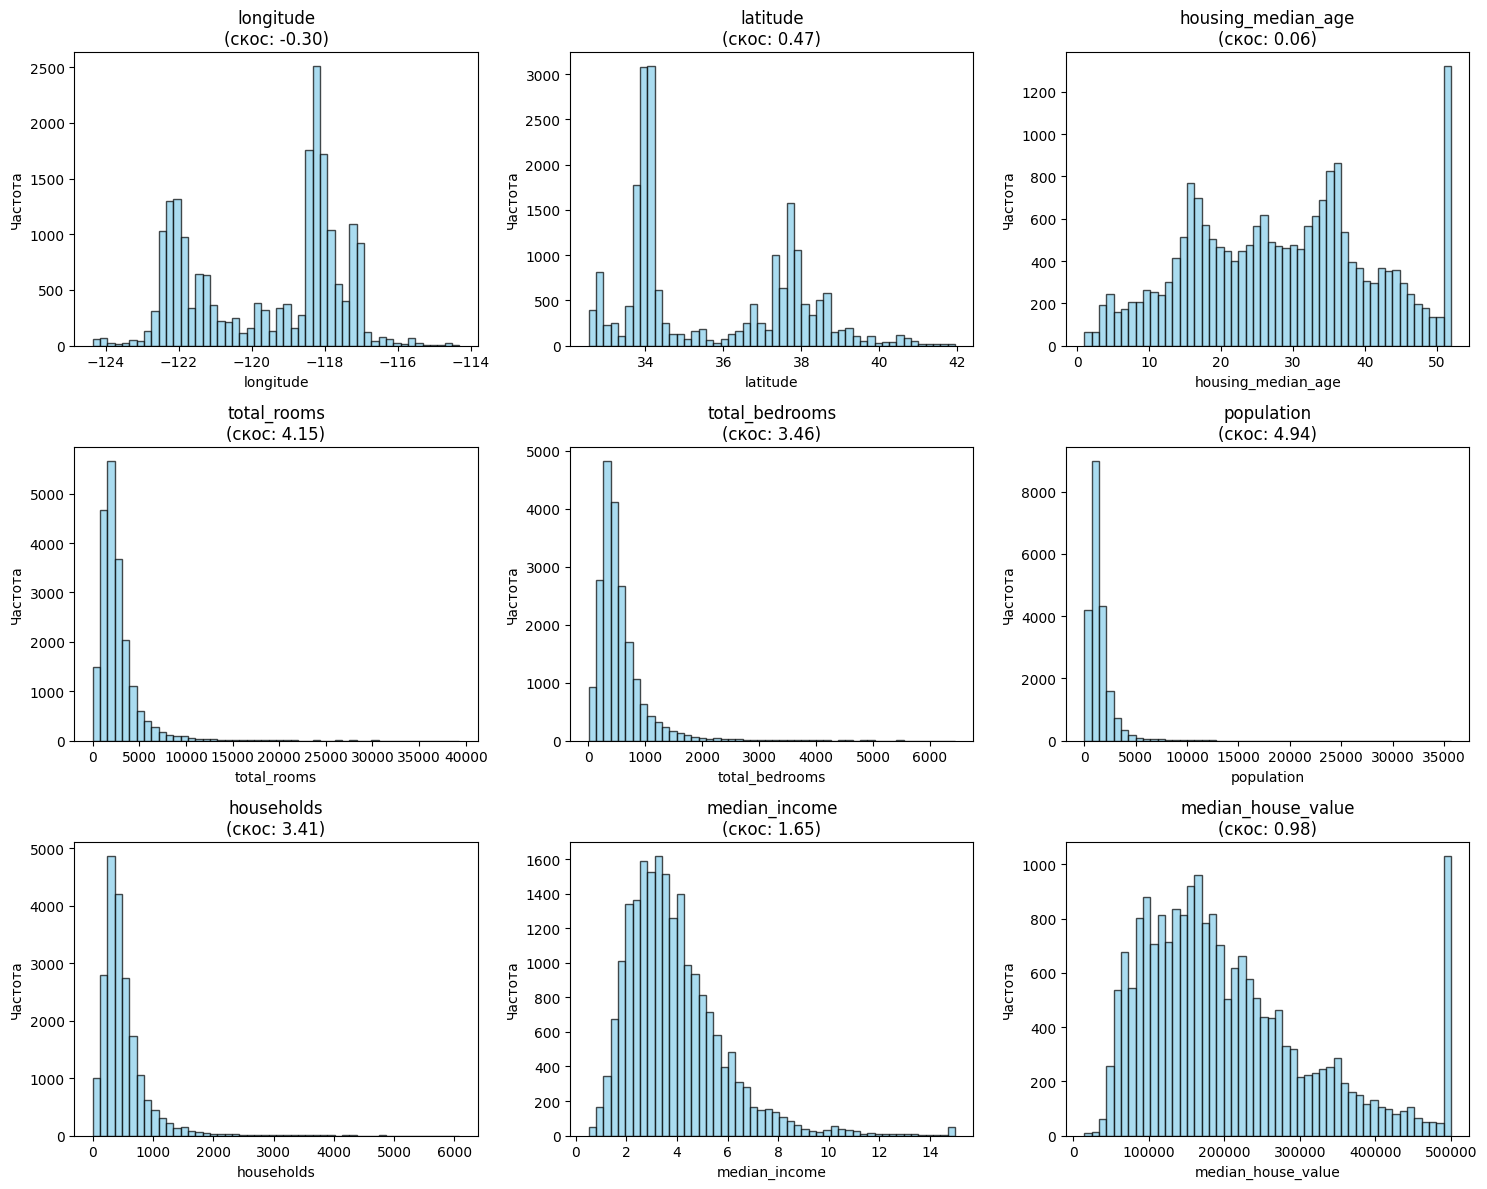

АНАЛИЗ НОРМАЛЬНОСТИ РАСПРЕДЕЛЕНИЙ:
  longitude: скос = -0.30 (близко к нормальному)
  latitude: скос = 0.47 (близко к нормальному)
  housing_median_age: скос = 0.06 (близко к нормальному)
  total_rooms: скос = 4.15 (сильное искажение)
  total_bedrooms: скос = 3.46 (сильное искажение)
  population: скос = 4.94 (сильное искажение)
  households: скос = 3.41 (сильное искажение)
  median_income: скос = 1.65 (сильное искажение)
  median_house_value: скос = 0.98 (умеренное искажение)


In [36]:
print("=== АНАЛИЗ РАСПРЕДЕЛЕНИЙ ===")

# Простая версия без KDE
n_cols = len(numeric_cols)
n_rows = (n_cols + 2) // 3  # По 3 графика в строке

fig, axes = plt.subplots(n_rows, 3, figsize=(15, 4*n_rows))
axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes

for i, col in enumerate(numeric_cols):
    if i < len(axes):
        # Гистограмма
        axes[i].hist(df[col].dropna(), bins=50, alpha=0.7, color='skyblue', edgecolor='black')
        axes[i].set_title(f'{col}\n(скос: {df[col].skew():.2f})')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Частота')

# Убираем лишние subplots
for i in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# Анализ нормальности
print("АНАЛИЗ НОРМАЛЬНОСТИ РАСПРЕДЕЛЕНИЙ:")
for col in numeric_cols:
    skewness = df[col].skew()
    if abs(skewness) < 0.5:
        normality = "близко к нормальному"
    elif abs(skewness) < 1:
        normality = "умеренное искажение"
    else:
        normality = "сильное искажение"
    print(f"  {col}: скос = {skewness:.2f} ({normality})")

=== АНАЛИЗ КАТЕГОРИАЛЬНЫХ ПЕРЕМЕННЫХ ===

Колонка: ocean_proximity
  Уникальных значений: 5
  Пропусков: 0 (0.0%)
  Топ-5 значений:
    '<1H OCEAN': 9136 записей (44.3%)
    'INLAND': 6551 записей (31.7%)
    'NEAR OCEAN': 2658 записей (12.9%)
    'NEAR BAY': 2290 записей (11.1%)
    'ISLAND': 5 записей (0.0%)


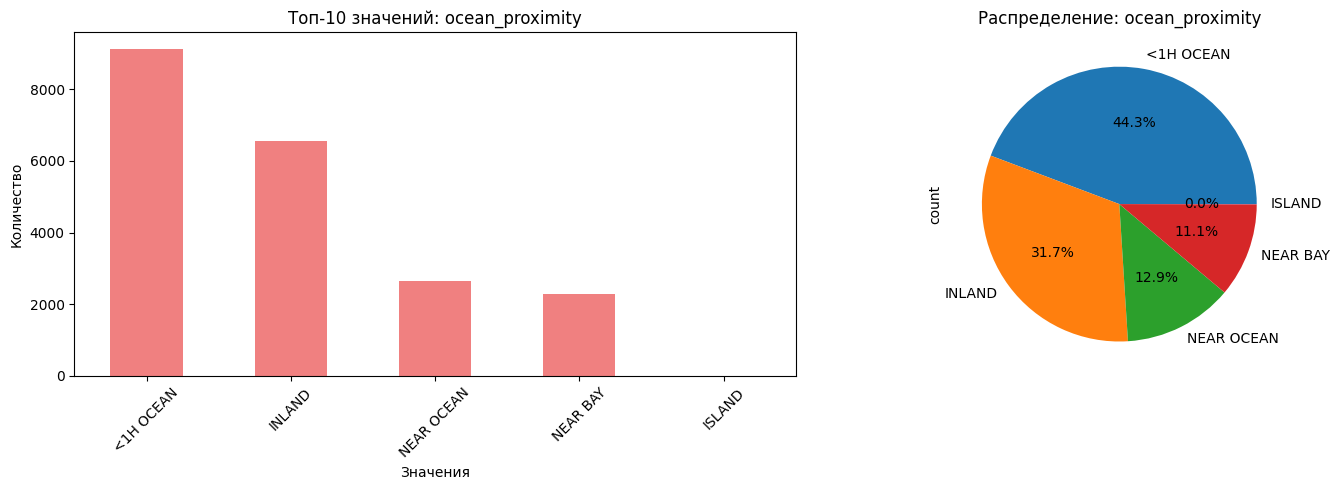

In [37]:
print("=== АНАЛИЗ КАТЕГОРИАЛЬНЫХ ПЕРЕМЕННЫХ ===")

if len(categorical_cols) == 0:
    print("Категориальных переменных не найдено")
else:
    for col in categorical_cols:
        print(f"\nКолонка: {col}")
        value_counts = df[col].value_counts()
        print(f"  Уникальных значений: {df[col].nunique()}")
        print(f"  Пропусков: {df[col].isnull().sum()} ({df[col].isnull().sum()/len(df)*100:.1f}%)")
        
        print(f"  Топ-5 значений:")
        for value, count in value_counts.head().items():
            print(f"    '{value}': {count} записей ({count/len(df)*100:.1f}%)")
        
        # Визуализация для колонок с небольшим количеством уникальных значений
        if df[col].nunique() <= 15:
            fig, axes = plt.subplots(1, 2, figsize=(15, 5))
            
            # Столбчатая диаграмма
            value_counts.head(10).plot(kind='bar', ax=axes[0], color='lightcoral')
            axes[0].set_title(f'Топ-10 значений: {col}')
            axes[0].set_xlabel('Значения')
            axes[0].set_ylabel('Количество')
            axes[0].tick_params(axis='x', rotation=45)
            
            # Круговая диаграмма или гистограмма частот
            if df[col].nunique() <= 8:
                value_counts.plot(kind='pie', ax=axes[1], autopct='%1.1f%%')
                axes[1].set_title(f'Распределение: {col}')
            else:
                value_counts.hist(ax=axes[1], bins=20, color='lightgreen')
                axes[1].set_title(f'Распределение частот: {col}')
                axes[1].set_xlabel('Частота')
                axes[1].set_ylabel('Количество значений')
            
            plt.tight_layout()
            plt.show()

In [38]:
print("=== СВОДНЫЙ ОТЧЕТ ПО ДАННЫМ ===")

report_data = {
    'Общие метрики': {
        'Записи': df.shape[0],
        'Признаки': df.shape[1],
        'Числовые колонки': len(numeric_cols),
        'Категориальные колонки': len(categorical_cols),
        'Память (MB)': f"{df.memory_usage(deep=True).sum() / 1024**2:.1f}"
    },
    'Проблемы данных': {
        'Всего пропусков': df.isnull().sum().sum(),
        'Колонок с пропусками': (df.isnull().sum() > 0).sum(),
        'Дубликаты': df.duplicated().sum(),
        'Колонок с выбросами': sum([1 for col in numeric_cols if len(find_outliers_iqr(df[col])) > 0])
    }
}

for section, metrics in report_data.items():
    print(f"\n{section}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value}")

print("\nРЕКОМЕНДАЦИИ ДЛЯ ДАЛЬНЕЙШЕЙ ОЧИСТКИ:")
if df.isnull().sum().sum() > 0:
    print("- Обработать пропущенные значения")
if df.duplicated().sum() > 0:
    print("- Удалить дубликаты")
if any([len(find_outliers_iqr(df[col])) > 0 for col in numeric_cols]):
    print("- Проанализировать выбросы")

=== СВОДНЫЙ ОТЧЕТ ПО ДАННЫМ ===

Общие метрики:
  Записи: 20640
  Признаки: 10
  Числовые колонки: 9
  Категориальные колонки: 1
  Память (MB): 2.5

Проблемы данных:
  Всего пропусков: 207
  Колонок с пропусками: 1
  Дубликаты: 0
  Колонок с выбросами: 6

РЕКОМЕНДАЦИИ ДЛЯ ДАЛЬНЕЙШЕЙ ОЧИСТКИ:
- Обработать пропущенные значения
- Проанализировать выбросы
